<a href="https://colab.research.google.com/github/jegazhu/python-projects/blob/main/Economics_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader.data as web
import datetime

today = pd.to_datetime("today")
start = datetime.datetime(2000, 1, 1)
end = today

df_Corp_AAA_yield = web.DataReader(['DAAA'], 'fred', start, end)

# not working - Corp_AAA_yield = web.DataReader(['DAAA'], 'fred', start, end)
df_Corp_AAA_yield.head()
df_Corp_AAA_yield.tail()

,DAAA
DATE,
2022-11-16,4.75
2022-11-17,4.77
2022-11-18,4.78
2022-11-21,4.75
2022-11-22,4.69


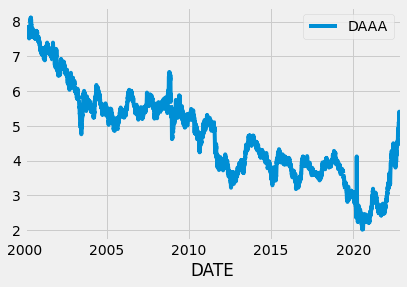

In [ ]:
df_Corp_AAA_yield.plot(grid=True)

In [ ]:
!pip install pandas-datareader -q

In [ ]:
from google.colab import drive, files
import pandas_datareader as pdr
import pandas as pd
import requests
import plotly.express as px
from datetime import datetime

# **Function for this sample**

In [ ]:
def get_fred_series_data(api_key,
                         series):
  # url
  url = "https://api.stlouisfed.org/geofred/series/data?series_id={0}&api_key={1}&file_type=json".format(series, api_key)
  # response
  response = requests.request("GET", url)
  return response

In [ ]:
def transform_series_response(response):
  latest_date = list(response.json()['meta']['data'].keys())[0]
  return pd.DataFrame(response.json()['meta']['data'][latest_date])

In [ ]:
def get_fred_data(param_list, start_date, end_date):
  df = pdr.DataReader(param_list, 'fred', start_date, end_date)
  return df.reset_index()

In [ ]:
############
# OPTIONAL #
############

# mount drive
#drive.mount('/content/drive', force_remount=False)

# data location
file_dir = '/content/drive/MyDrive/Python_Data/' # optional
fred_key = '/content/Fred_KeyAPI.csv'

In [ ]:
# read in api key file
df_api_keys = pd.read_csv(fred_key) # if you have your key stored in a csv file

# get keys
fred_api_key = 'abcdefghijklmnopqrstuvwxyz123456' # replace this with your own key from FRED website
#fred_api_key = pd.read_csv(fred_key)

In [ ]:
series = 'LES1252881600Q' # https://fred.stlouisfed.org/series/LES1252881600Q

In [ ]:
# get data for series
df = get_fred_data(param_list=['LES1252881600Q'], 
                   start_date='1979-01-01', 
                   end_date='2022-08-31')
df

,DATE,LES1252881600Q
0,1979-01-01,335
1,1979-04-01,335
2,1979-07-01,330
3,1979-10-01,326
4,1980-01-01,321
...,...,...
170,2021-07-01,367
171,2021-10-01,362
172,2022-01-01,362
173,2022-04-01,358


In [ ]:
# plot
fig = px.line(df, x="DATE", y="LES1252881600Q", title='Employment Cost Index: Wages and Salaries: Private Industry Workers')
fig.show()

In [ ]:
# get all series ids per series
response = get_fred_series_data(fred_api_key, series)
# transform response into a dataframe
df_all_series_ids = transform_series_response(response)
df_all_series_ids.head()

,region,code,value,series_id
0,Mississippi,28,647.576021,MSBPPRIVSA
1,Montana,30,545.203453,MTBPPRIVSA
2,Iowa,19,909.085499,IABPPRIVSA
3,Delaware,10,563.525166,DEBPPRIVSA
4,District of Columbia,11,451.000000,DCBPPRIVSA


In [ ]:
# get all series to a list
series_list = df_all_series_ids['series_id'].tolist()
print('Length of series list:', len(series_list) + 1)
series_list[:5] # show first five in list

Length of series list: 52


['MSBPPRIVSA', 'MTBPPRIVSA', 'IABPPRIVSA', 'DEBPPRIVSA', 'DCBPPRIVSA']

In [ ]:
# set range for time
start_date = '2021-01-01'
end_date = datetime.today().strftime('%Y-%m-%d') # today

# get series data
df_permits_all_series = get_fred_data(param_list=series_list, # all series to get data for
                                      start_date=start_date, # start date
                                      end_date=end_date) # get latest date
df_permits_all_series.head()

,DATE,MSBPPRIVSA,MTBPPRIVSA,IABPPRIVSA,DEBPPRIVSA,DCBPPRIVSA,NYBPPRIVSA,MNBPPRIVSA,ALBPPRIVSA,NCBPPRIVSA,GABPPRIVSA,MOBPPRIVSA,ORBPPRIVSA,RIBPPRIVSA,OKBPPRIVSA,ILBPPRIVSA,MEBPPRIVSA,WABPPRIVSA,NDBPPRIVSA,SDBPPRIVSA,VABPPRIVSA,ARBPPRIVSA,OHBPPRIVSA,KSBPPRIVSA,MABPPRIVSA,TNBPPRIVSA,AKBPPRIVSA,MIBPPRIVSA,CTBPPRIVSA,CABPPRIVSA,WVBPPRIVSA,WYBPPRIVSA,NMBPPRIVSA,KYBPPRIVSA,MDBPPRIVSA,HIBPPRIVSA,INBPPRIVSA,VTBPPRIVSA,UTBPPRIVSA,SCBPPRIVSA,NVBPPRIVSA,IDBPPRIVSA,AZBPPRIVSA,TXBPPRIVSA,NJBPPRIVSA,NHBPPRIVSA,FLBPPRIVSA,WIBPPRIVSA,PABPPRIVSA,LABPPRIVSA,COBPPRIVSA,NEBPPRIVSA
0,2021-01-01,724.014345,398.665500,1028.726787,717.554671,313.0,3715.596230,3114.323165,1949.215265,6531.136837,5467.010152,1362.062148,1349.814127,127.580924,1337.195231,1500.937048,458.0,4717.301056,1133.255464,1205.893758,3421.951785,1333.529882,2200.897676,677.431921,1505.850701,4159.871776,142.872396,2294.536309,348.784467,10652.557589,230.367010,266.626729,485.359188,1265.611863,1292.686265,398.612056,2218.971023,166.871940,3264.531374,3765.443561,2023.114754,1826.662208,5389.352289,21820.797846,3604.723816,307.785390,15707.889746,1969.438621,4904.015877,1622.506430,5240.045028,626.096172
1,2021-02-01,658.265875,324.619480,1270.710725,805.113848,749.0,3834.744487,2937.570598,1943.553806,7654.923320,4715.089106,1553.321754,1666.353565,122.004777,1196.543158,1575.794316,275.0,5030.324285,318.295389,538.682839,3001.159630,1115.257115,2754.143283,1041.824129,1437.165771,4093.894628,142.268436,2024.179401,340.571291,9740.064949,743.232705,193.683680,726.654665,1883.265334,1972.567727,341.161192,2207.475308,144.072861,3249.219324,3884.532122,2069.160683,1572.281825,5764.707674,19991.436655,2718.783358,327.623353,14211.612835,2093.908580,4224.208198,1472.908485,4219.141288,743.497476
2,2021-03-01,766.452425,653.587173,1825.783437,797.424228,589.0,3195.236009,3171.848991,1868.092997,8051.330186,5388.717909,1980.053977,2054.723688,143.115006,1325.264011,1370.742348,499.0,4338.389775,379.035271,623.103893,3805.052662,1702.934157,2571.301125,801.001303,1500.186692,5805.296758,148.889933,2181.726832,472.973561,11120.975771,396.800489,193.934766,598.695835,1540.951617,1375.233128,252.470086,2399.142553,164.936493,3336.884456,3935.549152,2039.449589,1745.245220,5061.349308,21257.888700,2784.621043,440.574384,16763.623620,2170.515921,4126.312965,1727.571788,4556.671648,920.273193
3,2021-04-01,738.824091,420.693708,1616.309533,844.725032,159.0,3155.167351,2890.688365,1538.982845,7795.562983,5732.150874,2080.485817,1918.479076,152.426248,1363.000846,1658.407007,651.0,4281.123606,259.960698,691.210488,3693.984215,1207.903684,2738.903887,743.846923,2090.378913,4989.864562,151.059284,1977.197648,722.254817,10393.598442,237.390024,202.074932,639.162274,1277.563321,1349.846659,359.270261,2165.890467,235.870035,3896.526880,4187.351035,2082.857256,1660.755613,5675.285781,22719.792635,3977.098060,420.281309,17505.369892,2137.687345,2546.104050,2293.513705,5569.455852,757.105101
4,2021-05-01,805.762903,351.054847,818.157913,821.320259,403.0,3958.573982,3188.732921,1722.800543,6480.986158,5304.609930,1478.769279,1870.656414,110.818926,1102.392703,1461.778325,745.0,4144.393441,315.795556,543.838640,2915.811819,854.857679,2832.091328,686.601980,1706.046598,5061.315980,121.576861,1686.165481,320.774320,9887.715517,277.239583,160.793054,551.074177,1193.780388,1279.601508,247.215780,2034.311453,170.878361,3345.271667,3855.942581,1624.668027,1315.556816,5171.173835,21172.234942,3151.665348,516.285736,17444.391155,1898.520465,2369.323199,1602.738131,4530.854794,889.431852


In [ ]:
# transform columns to single column
df_melt = pd.melt(df_permits_all_series, id_vars=['DATE'], value_vars=series_list, var_name='STATE', value_name='PERMITS')
df_melt.head()

,DATE,STATE,PERMITS
0,2021-01-01,MSBPPRIVSA,724.014345
1,2021-02-01,MSBPPRIVSA,658.265875
2,2021-03-01,MSBPPRIVSA,766.452425
3,2021-04-01,MSBPPRIVSA,738.824091
4,2021-05-01,MSBPPRIVSA,805.762903


In [ ]:
# modify state abbreviation
df_plot = df_melt.copy() # copy df
df_plot['STATE'] = df_plot.apply(lambda x: x['STATE'][:3], axis=1)
df_plot.head()

,DATE,STATE,PERMITS
0,2021-01-01,MSB,724.014345
1,2021-02-01,MSB,658.265875
2,2021-03-01,MSB,766.452425
3,2021-04-01,MSB,738.824091
4,2021-05-01,MSB,805.762903


In [ ]:
# plot
fig = px.line(df_plot, 
              x="DATE", # horizontal axis
              y="PERMITS", # vertical axis
              color='STATE', # split column
              title='Employed full time: Median usual weekly real earnings: Wage and salary workers: 16 years and over')
fig.show()

In [ ]:
# download file
file_name = f'{series}_{start_date}-{end_date}.csv'
df_plot.to_csv(file_name, index=False)
files.download(file_name)
print('Download {0}'.format(file_name))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download LES1252881600Q_2021-01-01-2022-11-24.csv
